<a href="https://colab.research.google.com/github/shravyapendyala/CCE_Assignment_1/blob/main/Weather_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sb
from sklearn.ensemble import ExtraTreesClassifier


**Importing Dataset**

In [75]:
dataset=pd.read_csv("weather_forecast_data.csv")
dataset.head(10)
#dataset['Rain']

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


**Label Encoding on Rain Column**

In [76]:
label_encoder=preprocessing.LabelEncoder()
dataset['Rain']=label_encoder.fit_transform(dataset['Rain'])
dataset.head(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


**Feature Selection using Correlation matrix**

<Axes: >

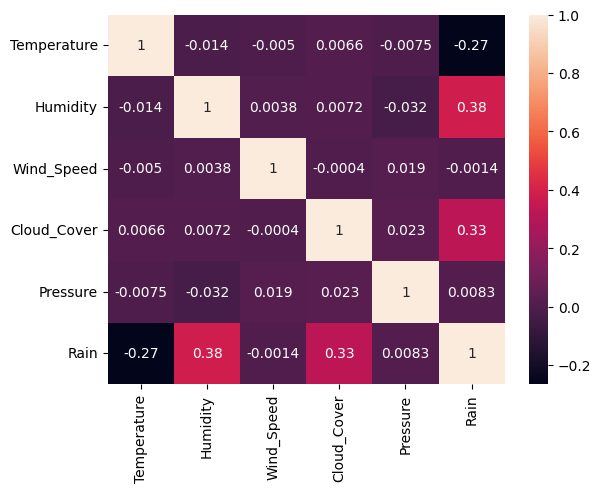

In [77]:
correl_mat=dataset.corr()
sb.heatmap(correl_mat,annot=True)

**Feature Selection using Extra Tree Classifier**

In [78]:
x=dataset.iloc[:, 0:5]
y=dataset.iloc[:, -1]

<BarContainer object of 5 artists>

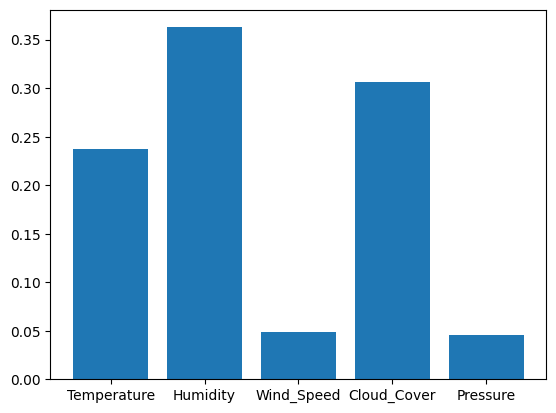

In [79]:
model=ExtraTreesClassifier()
model.fit(x,y)
imp=pd.Series(model.feature_importances_)
feature_importance = model.feature_importances_
plt.bar(x.columns, feature_importance)

**Dimentionality reduction by removing Wind_speed column**

In [80]:
dataset.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [81]:
new_dataset=dataset.drop(columns=['Wind_Speed'])

In [82]:
new_dataset

,Temperature,Humidity,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,50.501694,1032.378759,1
1,27.879734,46.489704,4.990053,992.614190,0
2,25.069084,83.072843,14.855784,1007.231620,0
3,23.622080,74.367758,67.255282,982.632013,1
4,20.591370,96.858822,47.676444,980.825142,0
...,...,...,...,...,...
2495,21.791602,45.270902,55.044682,1017.686181,0
2496,27.558479,46.481744,39.715133,1008.590961,0
2497,28.108274,43.817178,75.842952,999.119187,0
2498,14.789275,57.908105,2.378743,1046.501875,0


In [85]:
X=new_dataset.iloc[:, 0:4]
Y=new_dataset.iloc[:, -1]

**Feature Scaling**

**Splitting data into Training and Testing sets**

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

**Training the model using Random Forest Classifier**

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=100, random_state=0)
classifier1.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

**Calculating the classification score of Model**

In [94]:
classifier1.score(x_train,y_train)

1.0

**Predicting the outputs using the model**

In [106]:
y_pred1=classifier1.predict(x_test)
y_pred1=label_encoder.inverse_transform(y_pred1) # inversing the label encoding done to convert rain column to interger values

In [108]:
y_test=label_encoder.inverse_transform(y_test)

In [109]:
y_pred1=y_pred1.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [112]:
y_dataframe1=np.concatenate((y_pred1,y_test),axis=1)
y_dataframe1

array([['rain', 'rain'],
       ['no rain', 'no rain'],
       ['no rain', 'no rain'],
       ...,
       ['no rain', 'no rain'],
       ['no rain', 'no rain'],
       ['no rain', 'no rain']], dtype=object)

**Calculating Accuracy and Confusion matrix of the model**

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.9933333333333333

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[648,   0],
       [  5,  97]])

**Training the model using Logistic Regression**

In [117]:
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression( random_state=0)
classifier2.fit(x_train,y_train)

LogisticRegression(random_state=0)

**Calculating the classification score of Model**

In [118]:
classifier2.score(x_train,y_train)

0.932

**Predicting the outputs using the model**

In [120]:
y_pred2=classifier2.predict(x_test)
y_pred2=label_encoder.inverse_transform(y_pred2) # inversing the label encoding done to convert rain column to interger values

In [121]:
y_pred2=y_pred2.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [122]:
y_dataframe2=np.concatenate((y_pred2,y_test),axis=1)
y_dataframe2

array([['rain', 'rain'],
       ['no rain', 'no rain'],
       ['no rain', 'no rain'],
       ...,
       ['no rain', 'no rain'],
       ['no rain', 'no rain'],
       ['no rain', 'no rain']], dtype=object)

**Calculating Accuracy and Confusion matrix of the model**

In [123]:
accuracy_score(y_pred2,y_test)

0.9266666666666666

In [125]:
confusion_matrix(y_test,y_pred2)

array([[629,  19],
       [ 36,  66]])